# 📘 Algoritmo de Q-learning

## 🧠 ¿Qué es Q-learning?

**Q-learning** es un algoritmo de **aprendizaje por refuerzo (Reinforcement Learning - RL) off-policy** que permite a un agente aprender una política óptima para tomar decisiones mediante la interacción con un entorno. Fue propuesto por **Watkins y Dayan en 1992 [1]**.

Es un algoritmo **off-policy** y **basado en valores**, lo que significa que aprende el valor de las acciones independientemente de la política actual que sigue el agente.

---

## 📂 Categoría dentro de RL

- 🏷 **Tipo:** Off-policy  
- 🏷 **Basado en:** Valores  
- 🧠 **Aprende una función de valor $Q(s, a)$**: el valor esperado al tomar una acción $a$ en un estado $s$ y seguir la política óptima después.  
- 📊 **Utiliza una tabla $Q$ (Q-table)** para entornos discretos.  

---

## 🎯 Características importantes de Q-learning

- No requiere un modelo del entorno (*model-free*).
- Utiliza aprendizaje temporal (*Temporal Difference Learning*).
- Puede converger a una política óptima bajo ciertas condiciones (como exploración adecuada y tasa de aprendizaje decreciente).

---
## 🧮 Pseudocódigo del algoritmo Q-learning

### 📥 **Entrada**:
**Información del algoritmo**
- $\alpha$ : tasa de aprendizaje (learning rate)  
- $\gamma$: factor de descuento (discount factor)  
- $\epsilon$: tasa de exploración inicial (epsilon)  
- $\epsilon_{min}$: valor mínimo de epsilon  
- $\epsilon_{decay}$: factor de decaimiento de epsilon  
- $Episodes$: número total de episodios  
- $Max\_steps$: número máximo de pasos por episodio  

**Información del entorno**
- $A$: conjunto de acciones posibles  
- $S$: conjunto de estados posibles  

### 📤 Salida:
- $Q$: tabla $Q(s, a)$ aprendida con los valores de acción

### 📤 Configuración:
  1. Inicializar $Q(s, a)$ a ceros para todos los estados $s$ y acciones $a$.

### 📤 Ejecución:
  1. Repetir por cada episodio < Episodes:

     2. Inicializar el estado $s$ (normalmente aleatorio)

     3. Repetir por cada paso en el episodio < Max-steps:

        4. Generar una variable aleatoria, si esta es mayor a $\epsilon$:
           
           Seleccionar una acción a aleatoria (exploración)
        5. De lo contrario:
           
           Seleccionar acción de la tabla $Q$, $a = \max_a Q(s_t, a_t)$ (explotación)
        6. Aplicar el paso con la acción $a_t$, obteniendo la recompensa $r_t$ y el nuevo estado $s_{t+1}$

        7. Actualizar la tabla $Q$:
        $ Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha \left( r_t + \gamma \max_a{Q_t(s_{t+1},a)} - Q_t(s_t,a_t) \right) $

        8. $s_t$ ← $s_{t+1}$

        9. Si $s_t$ es un estado terminal, terminar el episodio

---

## 📐 Ecuación de actualización basado en la ecuación de Bellman

Así, Q-Learning optimiza la tabla siguiendo un proceso iterativo de actualizaciones ($t=0,1,2,\ldots$).
Dando pie a la siguiente ecuación:
$$ Q_{t+1}(s_t,a_t) = Q_t(s_t,a_t) + \alpha \left( r_t + \gamma \max_a{Q_t(s_{t+1},a)} - Q_t(s_t,a_t) \right) $$

Así, aplicando la acción $a_t$ en el estado $s_t$, se obtiene una recompensa $r_t$ y un nuevo estado $s_{t+1}$.

* La siguiente acción óptima debe cumplir $a_{t+1}=\max_{a}{Q(s_{t+1},a)}$ obteniendo la recompensa esperada: $r_t + \gamma \max_{a}{Q(s_{t+1},a)}$, con $\gamma$ como factor de descuento (olvido).
* comparar este valor-Q óptimo con el valor-Q actual $Q(s_t,a_t)$ en la tabla-$Q$. Entonces se actualiza el valor-Q actual por una tasa de aprendizaje $\alpha$.<br>

---

Q-learning es el algoritmo de aprendizaje por refuerzo mas antiguo, pero más utilizado para aprender conceptos básicos.

Para entender como trabaja, primero consideremos la recompensa esperada.

$$ R = \sum_{t=0}^{\infty} {\gamma^t r_t} $$

donde $r_t$ es una valor de recompensa (retorno) obtenido en el el tiempo $t$ y $\gamma$ es una tasa de descuento.

Como ejemplo para entender esta recompensa, imagina que quieres tomar un objeto con tu brazo de la mesa. Para esto necesitas realizar varias acciones:

1. Estirar (posicionar) el brazo para alcanzar el objeto: recompensa 0
2. Abrir la mano: recompensa 0
3. Cerrar la mano: recompensa 10

En este caso conseguiste una valor de recompensa hasta la acción #3 ($t=2$), sin embargo, las dos acciones anteriores contribuyen a la obtener esta recompensa final. Si consideramos que la acción #1 tiene la recompensa acumulada con el factor de descuento $\gamma=0.99$.

$$ R_{t=0} = 0 + 0.99 \times 0 + 0.99^2 \times 10 = 9.801 $$

Lo mismo para las recompensas posteriores, $R_{t=1} = 9.9, R_{t=2} = 10$.

---

## Algoritmo aplicado a un péndulo invertido

El entorno será modificado de manera externa debido a sus acciones continuas y el algoritmo trabaja con acciones discretas.

In [6]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    COLAB = True
    print("Nota: Usando Google CoLab")
except:
    print("Nota: Usando JupyterNotebook")
    COLAB = False

from IPython.display import Image, display
# Si estas en colab ejecutar. Para Jupyter realizar en consola
if COLAB:
  !pip install gymnasium
  !pip install numpy matplotlib
  !pip install renderlab
  !apt update && apt install xvfb
  !pip install gym-notebook-wrapper
else:
  %pip install gym-notebook-wrapper
  %pip install numpy matplotlib
  %pip install gymnasium
  %pip install renderlab

from IPython.display import clear_output
import warnings
import gymnasium as gym
import numpy as np
import renderlab as rl
import matplotlib.pyplot as plt
import pickle

warnings.filterwarnings('ignore')
clear_output()

### Simulación sin entrenamiento

In [7]:
env = gym.make("Pendulum-v1", render_mode = "rgb_array") # Instancia el entorno
env = rl.RenderFrame(env, "./output") # Inicializa la carpeta para render

#observation, info = env.reset() #Reinicia el entorno y genera la primera imagen
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

# Ejecución del entorno con acciones aleatorias

# Hiperparámetros
episodes = 1
max_steps = 200

for episode in range(episodes):
    obs, _ = env.reset()

    for _ in range(max_steps):
        action = env.action_space.sample()
        next_obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        if done:
            break
    env.play()
env.close()

Action Space: Box(-2.0, 2.0, (1,), float32)
Observation Space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


### Entrenamiento

In [8]:
def train(env):

    print(f"Entrenamiento iniciado")
    # hiperparámetros
    learning_rate_a = 0.1        # tasa de aprendizaje
    discount_factor_g = 0.9      # factor de descuento
    epsilon = 1                  # acciones aleatorias
    epsilon_decay_rate = 0.0005  # epsilon decay rate
    epsilon_min = 0.05           # epsilon minimo
    divisions = 15               # divisiones de los estados continuos a discretos

    # Divide las observaciones en estados discretos
    x  = np.linspace(env.observation_space.low[0], env.observation_space.high[0], divisions)
    y  = np.linspace(env.observation_space.low[1], env.observation_space.high[1], divisions)
    w  = np.linspace(env.observation_space.low[2], env.observation_space.high[2], divisions)

    # Divide las acciones en acciones discretas
    a = np.linspace(env.action_space.low[0], env.action_space.high[0], divisions)

    # inicia la tabla-Q de 16x16x16x16
    q = np.zeros((len(x)+1, len(y)+1, len(w)+1, len(a)+1))

    episodes = 10000
    best_reward = -99999
    rewards_per_episode = []
    i = 0

    while(i<episodes):

        state = env.reset()[0]
        s_i0  = np.digitize(state[0], x)
        s_i1  = np.digitize(state[1], y)
        s_i2  = np.digitize(state[2], w)

        rewards = 0
        steps = 0

        # Empiezan el episodio
        while(steps < 1000):
            # Selección de acción epsilon-greedy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
                action_idx = np.digitize(action, a)
            else:
                action_idx = np.argmax(q[s_i0, s_i1, s_i2, :])
                action = a[action_idx-1]

            # Aplica la acción
            new_state,reward,_,_,_ = env.step([action])

            # Discretiza el nuevo estado
            ns_i0  = np.digitize(new_state[0], x)
            ns_i1  = np.digitize(new_state[1], y)
            ns_i2  = np.digitize(new_state[2], w)

            # Actualiza la tabla-Q
            q[s_i0, s_i1, s_i2, action_idx] = \
                q[s_i0, s_i1, s_i2, action_idx] + \
                learning_rate_a * (
                    reward + discount_factor_g*np.max(q[ns_i0, ns_i1, ns_i2,:])
                        - q[s_i0, s_i1, s_i2, action_idx]
                )

            state = new_state
            s_i0 = ns_i0
            s_i1 = ns_i1
            s_i2 = ns_i2

            rewards += reward
            steps += 1

            if rewards>best_reward:
                best_reward = rewards

                # Salva la tabla-Q cuando tiene una mejora
                f = open('pendulum.pkl','wb')
                pickle.dump(q, f)
                f.close()

        rewards_per_episode.append(rewards)

        # Da un avance del entrenamiento
        if i!=0 and i%1000==0:
            mean_reward = np.mean(rewards_per_episode[len(rewards_per_episode)-100:])
            print(f'Episode: {i}, Epsilon: {epsilon:0.2f}, Best Reward: {best_reward}, Mean Rewards {mean_reward:0.1f}')

            # Grafica las recompensas promedio
            mean_rewards = []
            for t in range(i):
                mean_rewards.append(np.mean(rewards_per_episode[max(0, t-100):(t+1)]))
            plt.plot(mean_rewards)
            plt.savefig(f'pendulum.png')

        # disminuye epsilon
        epsilon = max(epsilon - epsilon_decay_rate, epsilon_min)

        i+=1

def eval(env, save=False):
  divisions = 15

  x  = np.linspace(env.observation_space.low[0], env.observation_space.high[0], divisions)
  y  = np.linspace(env.observation_space.low[1], env.observation_space.high[1], divisions)
  w  = np.linspace(env.observation_space.low[2], env.observation_space.high[2], divisions)

  a = np.linspace(env.action_space.low[0], env.action_space.high[0], divisions)

  # Carga la tabla-Q si esta en la misma sesión
  f = open('pendulum.pkl', 'rb')
  q = pickle.load(f)
  f.close()

  # Guardar el archivo con pickle
  if save:
    ruta_guardado = '/content/drive/My Drive/Colab Notebooks/pendulum.pkl'
    with open(ruta_guardado, 'wb') as f:
      pickle.dump(q, f)
    print(f"Archivo guardado en: {ruta_guardado}")

  best_reward = -99999
  rewards_per_episode = []
  i = 0
  state = env.reset()[0]
  s_i0  = np.digitize(state[0], x)
  s_i1  = np.digitize(state[1], y)
  s_i2  = np.digitize(state[2], w)

  rewards = 0
  steps = 0

  while(steps < 500):

    # Selecciona una acción ya con el algoritmo entrenado desde la tabla-Q
    action_idx = np.argmax(q[s_i0, s_i1, s_i2, :])
    action = a[action_idx-1]

    new_state,reward,_,_,_ = env.step([action])

    ns_i0  = np.digitize(new_state[0], x)
    ns_i1  = np.digitize(new_state[1], y)
    ns_i2  = np.digitize(new_state[2], w)

    state = new_state
    s_i0 = ns_i0
    s_i1 = ns_i1
    s_i2 = ns_i2

    rewards += reward
    steps += 1
  env.play()
  print(f'Reward: {rewards:0.1f}')
  env.close()


Entrenamiento iniciado
Episode: 1000, Epsilon: 0.50, Best Reward: [-3341.19532945], Mean Rewards -4861.3
Episode: 2000, Epsilon: 0.05, Best Reward: -0.005307752077614015, Mean Rewards -1256.9
Episode: 3000, Epsilon: 0.05, Best Reward: -0.00197568473496545, Mean Rewards -585.9
Episode: 4000, Epsilon: 0.05, Best Reward: -0.00197568473496545, Mean Rewards -558.5
Episode: 5000, Epsilon: 0.05, Best Reward: -0.00197568473496545, Mean Rewards -488.7
Episode: 6000, Epsilon: 0.05, Best Reward: -0.00197568473496545, Mean Rewards -393.6
Episode: 7000, Epsilon: 0.05, Best Reward: -0.004579159240364884, Mean Rewards -371.2
Episode: 8000, Epsilon: 0.05, Best Reward: -0.001042624952157881, Mean Rewards -457.1
Episode: 9000, Epsilon: 0.05, Best Reward: -0.001042624952157881, Mean Rewards -404.5


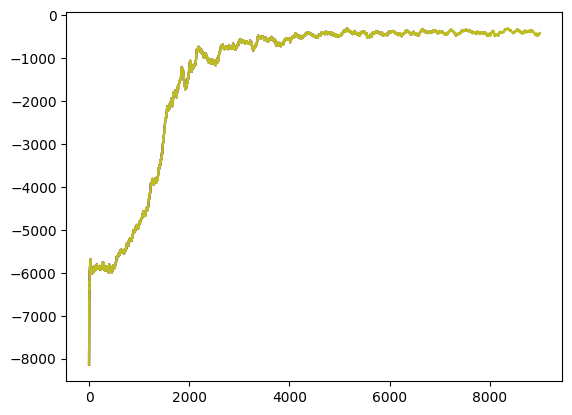

In [ ]:
env = gym.make('Pendulum-v1', render_mode=None)
train(env)

### Evaluación del aprendizaje

In [9]:
env = gym.make('Pendulum-v1', render_mode='rgb_array')
env = rl.RenderFrame(env, "./output") # Inicializa la carpeta para render
eval(env,True)

Archivo guardado en: /content/drive/My Drive/Colab Notebooks/pendulum.pkl
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward: -131.4


---

## Algoritmo aplicado al CartPole

### Simulación con acciones aleatorias

In [12]:
import gymnasium as gym
import renderlab as rl
import numpy as np
import math

env = gym.make("CartPole-v1", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")

max_steps = 700
obs, _ = env.reset()

for _ in range(max_steps):
  action = env.action_space.sample()
  obs, reward, terminated, truncated, info = env.step(action)

env.play()
env.close()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


CartPole tiene 4 elementos continuos (float) en el espacio de observación. Para poder aplicar el algoritmo de Q-learning original, es necesario convertir los estdos continuos (**discretos**).
En este ejemplo, se convierte la tupla (Box, Box, Box, Box) en tuplas (Discrete(20), Discrete(20), Discrete(20), Discrete(20)) - que convierte valores flotantes a el valor de cada segemento en que aparece.

![discretize](https://github.com/tsmatz/reinforcement-learning-tutorials/blob/master/assets/discretize.png?raw=1)

In [13]:
env = gym.make("CartPole-v1")
bin = 20
new_observation_shape = (bin, bin, bin, bin)

bins = []
total_states = 4
for i in range(total_states):
    item = np.linspace(
        env.observation_space.low[i] if (i == 0) or (i == 2) else -4,
        env.observation_space.high[i] if (i == 0) or (i == 2) else 4,
        num=new_observation_shape[i],
        endpoint=False)
    item = np.delete(item, 0)
    bins.append(item)
    print(bins[i])

# Funcion para convertir a estados discretos
def get_discrete_state(s):
    new_s = []
    for i in range(total_states):
        new_s.append(np.digitize(s[i], bins[i]))
    return new_s

# Consigue una acción desde la tabla-Q con exploración greedy
def pick_sample(s, eval):
    # consigue una acción óptima,
    # pero con exploración greedy previene mínimos locales en los episodios iniciales
    if np.random.random() > epsilon or eval==1:
        a = np.argmax(q_table[tuple(s)])
    else:
        a = np.random.randint(0, env.action_space.n)
    return a

[-4.32       -3.8400002  -3.3600001  -2.88       -2.4        -1.9200001
 -1.44       -0.96000004 -0.48000002  0.          0.48000002  0.96000004
  1.44        1.9200001   2.4         2.88        3.3599997   3.8400002
  4.3200006 ]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]
[-0.37699112 -0.3351032  -0.29321533 -0.25132743 -0.20943952 -0.16755164
 -0.12566373 -0.08377582 -0.04188791  0.          0.04188788  0.08377576
  0.1256637   0.16755158  0.20943952  0.2513274   0.29321527  0.3351032
  0.3769911 ]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]


Después se tiene que gnerar una tabla-Q $Q(s,a)$ e iniciar todos sus valores a 0.

In [14]:
q_table = np.zeros(new_observation_shape + (env.action_space.n,))
q_table.shape

(20, 20, 20, 20, 2)

Ahora, hay que actualizar la tabla-Q con el algoritmo de Q-learning con el algoritmo de exploración $\epsilon$-Greedy.

In [45]:
# Parametros de diseño

gamma = 0.99
alpha = 0.1
epsilon = 1
epsilon_decay = epsilon / 4000
episodes = 6000

env = gym.make("CartPole-v1")
reward_records = []
for i in range(episodes):
    done = False
    total_reward = 0
    s, _ = env.reset()
    s_dis = get_discrete_state(s)
    while not done:
        a = pick_sample(s_dis, 0)
        s, r, term, trunc, _ = env.step(a)
        done = term or trunc
        s_dis_next = get_discrete_state(s)

        # actualiza la tabla-Q
        maxQ = np.max(q_table[tuple(s_dis_next)])
        q_table[tuple(s_dis)][a] += alpha * (r + gamma * maxQ - q_table[tuple(s_dis)][a])

        s_dis = s_dis_next
        total_reward += r
        #print(i)

    if i%100==0:
        print("episodio ", i)
        print("recompensa ", total_reward)
        #print("episodio {} con recompensa {}".format{i, total_reward}, end="\r")
    # Update epsilon for each episode
    if epsilon - epsilon_decay >= 0:
        epsilon -= epsilon_decay

    # Record total rewards in episode (max 500)
    reward_records.append(total_reward)

print("\nTermino")
env.close()

recompensa  15.0
recompensa  16.0
recompensa  30.0
recompensa  37.0
recompensa  43.0
recompensa  37.0
recompensa  94.0
recompensa  24.0
recompensa  20.0
recompensa  47.0
recompensa  35.0
recompensa  66.0
recompensa  17.0
recompensa  24.0
recompensa  22.0
recompensa  99.0
recompensa  36.0
recompensa  78.0
recompensa  29.0
recompensa  120.0
recompensa  147.0
recompensa  199.0
recompensa  86.0
recompensa  11.0
recompensa  31.0
recompensa  264.0
recompensa  211.0
recompensa  126.0
recompensa  143.0
recompensa  230.0
recompensa  251.0
recompensa  337.0
recompensa  476.0
recompensa  500.0
recompensa  285.0
recompensa  157.0
recompensa  391.0
recompensa  388.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  500.0
recompensa  50

In [46]:
# Guardar el archivo con pickle
ruta_guardado = '/content/drive/My Drive/Colab Notebooks/cartpole.pkl'
with open(ruta_guardado, 'wb') as f:
    pickle.dump(q_table, f)
print(f"Archivo guardado en: {ruta_guardado}")

Archivo guardado en: /content/drive/My Drive/Colab Notebooks/cartpole.pkl


In [47]:
# Evaluación

env = gym.make("CartPole-v1", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")
reward_records = []
eval_episode = 1
for i in range(eval_episode):
    done = False
    total_reward = 0
    r=0
    s, _ = env.reset()
    s_dis = get_discrete_state(s)
    while not done:
        a = pick_sample(s_dis,1)
        s, r, term, trunc, _ = env.step(a)
        done = term or trunc
        s_dis_next = get_discrete_state(s)
        s_dis = s_dis_next
        total_reward += r

    # Recompensa total del episodio (max 500)
    print("Evaluación {} con recompensa {}".format(i, total_reward), end="\r")
    env.play()
env.close()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


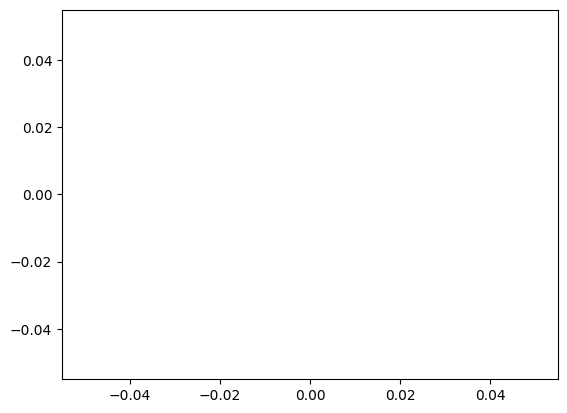

In [48]:
import matplotlib.pyplot as plt
# Genera el promedio en intervalos de 50
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(reward_records)
plt.plot(average_reward)

## 📚 Referencias

[1] Watkins, C. J. C. H., & Dayan, P. (1992). *Q-learning*. Machine Learning, 8, 279–292. https://doi.org/10.1007/BF00992698